In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
base_dir = '/Users/ankusmanish/Desktop/CNN/dataset'
train_dir = os.path.join(base_dir, 'training_set')
validation_dir = os.path.join(base_dir, 'test_set')

In [7]:
train_cats_dir = os.path.join(train_dir, 'cats')  
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats')  
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  

In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 4001
total training dog images: 4001
total validation cat images: 1001
total validation dog images: 1001
--
Total training images: 8002
Total validation images: 2002


In [10]:
BATCH_SIZE = 200 
EPOCHS = 30
IMG_SHAPE  = 150  

In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


In [12]:
train_dir

'/Users/ankusmanish/Desktop/CNN/dataset/training_set'

In [13]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 8000 images belonging to 2 classes.


In [14]:
train_data_gen[0][0][0].shape

(150, 150, 3)

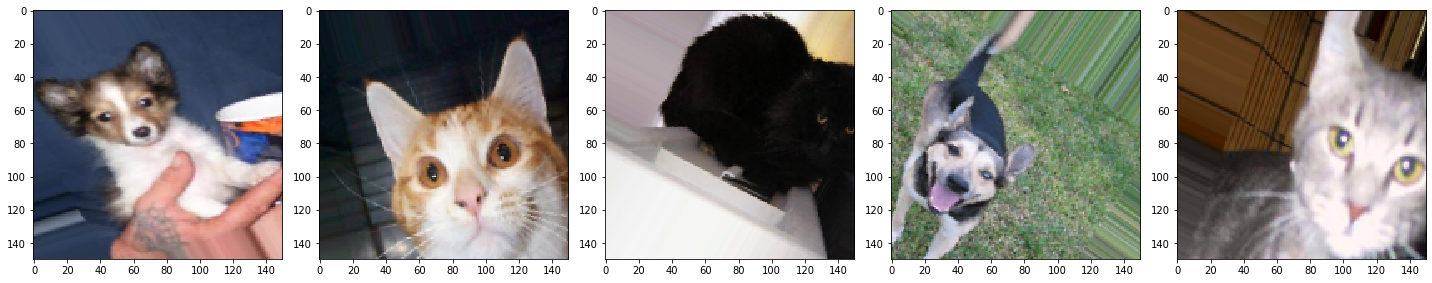

In [15]:
augmented_images, _ = next(train_data_gen)
plotImages(augmented_images[:5])  # Plot images 0-4

In [16]:
augmented_images.shape

(200, 150, 150, 3)

In [17]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [39]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(total_train / BATCH_SIZE),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(total_val / BATCH_SIZE),
    workers = 0
)

Epoch 1/30
40/40 [==============================] - 71s 2s/step - loss: 0.6508 - acc: 0.6145 - val_loss: 0.6318 - val_acc: 0.6350
Epoch 2/30
40/40 [==============================] - 69s 2s/step - loss: 0.6400 - acc: 0.6226 - val_loss: 0.6133 - val_acc: 0.6565
Epoch 3/30
40/40 [==============================] - 69s 2s/step - loss: 0.6217 - acc: 0.6501 - val_loss: 0.6067 - val_acc: 0.6625
Epoch 4/30
40/40 [==============================] - 68s 2s/step - loss: 0.5974 - acc: 0.6716 - val_loss: 0.5544 - val_acc: 0.7125
Epoch 5/30
40/40 [==============================] - 68s 2s/step - loss: 0.5824 - acc: 0.6885 - val_loss: 0.5333 - val_acc: 0.7555
Epoch 6/30
40/40 [==============================] - 68s 2s/step - loss: 0.5672 - acc: 0.7044 - val_loss: 0.5063 - val_acc: 0.7565
Epoch 7/30
40/40 [==============================] - 69s 2s/step - loss: 0.5579 - acc: 0.7120 - val_loss: 0.4789 - val_acc: 0.7600
Epoch 8/30
40/40 [==============================] - 69s 2s/step - loss: 0.5683 - acc: 0.70

In [41]:
import cv2

In [51]:
pred = validation_dir + '/dogs/dog.4002.jpg'

In [52]:
img = cv2.imread(pred)
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

In [55]:
pred = model.predict_classes(img)
if pred == 1:
    print("The given image is a DOG")
elif pred == 0:
    print("The given image is a CAT")

The given image is a DOG
